# Day 23 Pre-class: More practice manipulating 2D Numpy Arrays

### <p style="text-align: right;"> &#9989; Put your name here</p>

<img src="https://fairvote.org/wp-content/uploads/2022/08/Ballot-RCV-Section-blue-1.png" width=600>

### Goals for this pre-class assignment
By the end of this assignment, you should be able to:
* Practice Accessing and manipulating data in 2D NumPy arrays
* Explore the impact of different modes of voting on the winning candidate

### Assignment instructions

Watch the videos below, do the readings linked to below the videos, and complete the assigned programming problems.  Please get started early, and come to office hours if you have any questions! Make use of Teams as well!

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---

# Introduction

In our previous few assignments, 2D arrays have primarily been used to represent a position in space (such as a pixel in an image, a battleship position, or a tree in a forest). However, 2D arrays NumPy can be used for any application where you want to access data and perform operations. One of NumPy's strengths as a Python module is the ability to do operations on large amounts of data very efficiently.

So far, we have explored operations in 2D arrays visually, but in this assignment, we will explore ways to get information (by doing different operations) from 2D arrays that are not as easily visualized. In particular, we will explore applications of voting theory!

&#9989;&nbsp; **Task:** First, to get some context, read this [introduction to voting theory](https://www.princeton.edu/~cuff/voting/theory.html) up to "Resolving the Controversy" and answer the question below! (you're welcome to read the whole thing, but just reading up to that point should be sufficient for allowing you to answer the question)

**Why does the wrong candidate often get elected with Plurality voting?**

<font size="+3">&#9998;</font> *Put your answer here*

&#9989;&nbsp; **Task:** In this assignment, we will explore different methods of voting and how they can affect the outcome of the election. Watch the video below and answer the question below.

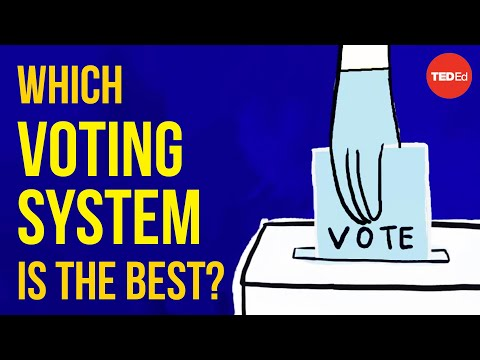

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("PaxVCsnox_4",width=640,height=360)

&#9989;&nbsp; **Question:** As the video states, voting methods essentially all have at least some drawbacks. Thinking about the different forms of voting mentioned (or choose your own!), choose one of the forms of voting and describe who benefits (and who does not) in that scenario.

<font size="+3">&#9998;</font> *Put your answer here*

## Ranked Choice Voting with Arrays

In recent years, implementing [ranked choice voting](https://ballotpedia.org/Ranked-choice_voting_(RCV)) has gained more broad support. For ranked choice voting, instead of selecting a single candidate on the ballot, a voter instead ranks all of the candidates. 

---

If a candidate selects only one candidate on the ballot (i.e. plurality voting), we can represent this information in a 1 dimensional array. Suppose we have candidates A, B, and C. We might then create a list of all the ballot information like: [B,A,C,C,B,A,B,A,C,....], where each element in the array is a voter's choice. 

However, if a voter ranks all of the candidates on the ballot, which can be used for multiple voting systems, we need 2 dimensions to store that information. 

We might represent the ballot information like: [[B,C,A],[A,B,C],[C,A,B],[B,C,A],...], where each inner list is a ballot of a single voter. By convention, let's say that the ordering of each ballot goes from most preferred to least preferred. 

The dataset in the cell below can be represented in Table 1 below. 

<center> Table 1: Voter Profile </center>

| %      | 29 | 1 | 23 | 3 | 18 | 26 |
|--------|----|---|----|---|----|----|
| First  | A  | A | B  | B | C  | C  |
| Second | B  | C | A  | C | A  | B  |
| Third  | C  | B | C  | A | B  | A  |



The numbers on top say the frequency of a type of ballot in the dataset. For example, 29% of voters had the ballot [a,b,c]. In the dataset above, we consider 100 voters, so we have 29 ballots of [a,b,c].

In [2]:
# Generating the data table
import numpy as np
import random
ballot_list=[]
for i in range(29):
    ballot_list.append(['a','b','c'])
for i in range(1):
    ballot_list.append(['a','c','b'])
for i in range(23):
    ballot_list.append(['b','a','c'])
for i in range(3):
    ballot_list.append(['b','c','a'])
for i in range(26):
    ballot_list.append(['c','b','a'])
for i in range(18):
    ballot_list.append(['c','a','b'])

# make the data into a 2D numpy array    
ballot_list=np.array(ballot_list)
# use np.random.shuffle to mix up the order just for fun and authenticity
np.random.shuffle(ballot_list)

In [3]:
# printing out our data
print(ballot_list)

[['b' 'a' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'a' 'b']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['a' 'b' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['c' 'b' 'a']
 ['b' 'a' 'c']
 ['b' 'c' 'a']
 ['b' 'a' 'c']
 ['b' 'a' 'c']
 ['a' 'b' 'c']
 ['c' 'a' 'b']
 ['c' 'b' 'a']
 ['c' 'a' 'b']
 ['c' 'b' 'a']
 ['c' 'b' 'a']
 ['a' 'c' 'b']
 ['b' 'a' 'c']
 ['c' 'a' 'b']
 ['c' 'a' 'b']
 ['c' 'a' 'b']
 ['a' 'b' 'c']
 ['a' 'b' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['c' 'a' 'b']
 ['c' 'b' 'a']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['c' 'b' 'a']
 ['c' 'a' 'b']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'b' 'a']
 ['c' 'a' 'b']
 ['a' 'b' 'c']
 ['c' 'b' 'a']
 ['a' 'b' 'c']
 ['a' 'b' 'c']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['a' 'b' 'c']
 ['c' 'a' 'b']
 ['c' 'b' 'a']
 ['c' 'b' 'a']
 ['a' 'b' 'c']
 ['b' 'a' 'c']
 ['c' 'a' 'b']
 ['c' 'b' 'a']
 ['a' 'b' 'c']
 ['b' 'c' 'a']
 ['b' 'a' 

&#9989;&nbsp; **Question:** What information do we need to calculate the plurality winner, and where can we find it in the data set?

<font size="+3">&#9998;</font> *Put your answer here*

&#9989;&nbsp; **Task:** We have more information than we need, but we can still determine which candidate has the most amount of first choice votes. Write a function called `plurality` that takes in a ballot list and returns the plurality winner. We will assume all elections have three candidates running and there will be no tie. Test your function on the `ballot_list` data! For the purposes of this function, your function can return `0` if Candidate A is the winner, `1` if Candidate B is the winner, and `2` if Candidate C is the winner.

If you're stuck, here are some **hints**:
- One option is to have your function can create an array that holds the number of first choice votes for candidate A in position zero, the first choice votes for candidate B in position one, and the first choice votes for candidate C in position two. You can then fill in each position in this array with the corresponding number of candidate votes, using the ballot list.
- If you use this array approach, your function can then return the index in that array that has the most votes (i.e. the index where the largest value is located). As useful for determine the index that contains the largest value is NumPy's `argmax()` function, which finds the maximum in an array and returns the index for where that maximum values is located.

In [4]:
# put your code here

&#9989;&nbsp; **Task:** Look back at Table 1. Calculate the plurality winner by hand. Do you get the same winner using your function as you do by hand? If not, what bugs are in your code?

<font size="+3">&#9998;</font> *Put your answer here*

&#9989;&nbsp; **Task:** Using your function above we could calculate the percentage of each candidate winning the first place vote. But what if we wanted to know what fraction of the ballots had the candidate ranked last?

Write a function below that finds the fraction of a candidate being ranked **last**. This function should take in a ballot list and a candidate name (A, B, or C) and return the fraction of last place votes recieved by that candidate. There is more than one way to do this, but if an approach doesn't immediately come to mind, you could try modifying your code from above to calculate the number of last place votes for the given candidate and, once you have that, you could calculate the fraction for that candidate compared to the total number of votes cast.

Use your new function to calculate the fraction of last place votes **each candidate** received.

 &#9989;&nbsp; **Task:** Look back at who won the plurality vote. Do your newest results surprise you? Why?

<font size="+3">&#9998;</font> *Put your answer here*

---
## More Complex Voting Methods (time and interest permitting)

**Important note**: If you've made it to this point and you're enjoying this topic and want to push yourself to learn mode and try to pick up some additional coding techniques for interacting with NumPy arrays, you are encouraged to keep working through the notebook. If you're pressed for time or already ran into some struggles with the code above, you do not need to complete the rest of this PCA to get credit.

With that note out of the way... let's move on to a slightly more complicated voting method! In this voting method, we only care about two candidates and ignore the rest. For each ballot, the candidate (out of the two we care about) that is most preferred recieves that ballot's vote. 

&#9989;&nbsp; **Task:** Using the `ballot_list` 2D numpy array, write a line (or lines) of code that use `np.where` to determine the indices of all of the values in `ballot_list` that are equal to the two candidates we care about (use candidate 'a' and candidate 'b' for testing).

**Note:** `np.where` is a numpy function that allows you to get the indices of a value in a NumPy array. 
For example:

`np.where(ballot_list == 'a')`

will tell you where all of the values of the string 'a' are located in `ballot_list`. Try it in the cell below!

In [7]:
# put your code here

 &#9989;&nbsp; **Task:** What is your result? You should have see two arrays- what do you think each one means?

<font size="+3">&#9998;</font> *Put your answer here*

Notice that we can also use np.where on one dimensional numpy arrays. 

 &#9989;&nbsp; **Task:**  Create a numpy array with 5 numbers of your choice and `print(np.where(my_array==PICK NUMBER HERE))`. What are your results?

In [9]:
# put your code here

---
Now that you can access the indices of all of the candidate votes, we can use that to compute the winning candidate for *pairwise* voting. 

&#9989;&nbsp; **Task:** Edit the function `pairwise` below that takes in the list of ballots and the names of the two candidates (i.e. the strings 'a', 'b', or 'c') and returns the winning candidate. You should use your `np.where` code from above for reference! Add comments as you need to understand what this function is doing.

In [11]:
# put your answer here


def pairwise(ballot,c1,c2):
    candidate_count= np.zeros((2,1)) # initialize an array to store the vote counts
    for item in bl:
        if '''compare the indices of c1 and c2''': #remember the smaller the index the better!
            candidate_count[0]+=1
        else:
            candidate_count[1]+=1
    print(candidate_count)
    return np.argmax(candidate_count)

&#9989;&nbsp; **Task:** Look back at Table 1. Calculate the pairwise winner by hand. Do you get the same winner using your function as you do by hand? If not, what bugs are in your code?

<font size="+3">&#9998;</font> *Put your answer here*

---
## Assignment wrap-up
Please fill out the form that appears when you run the code below. You must completely fill this out in order to receive credit for the assignment!

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800" 
	height="600" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

-----------

### Acknowledgements

Recent Contributors of This Work Made By: Rachel Roca and Rachel Frisbie. Original assignments and content co-generated by faculty, postdocs, and graduate students in the Department of Computational Mathematics, Science and Engineering.

&#169; Copyright 2023,  Michigan State University Board of Trustees